In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

%matplotlib inline

In [4]:
df_control = pd.read_csv("../data_files/clean/web_data_filtered_control.csv")
df_test = pd.read_csv("../data_files/clean/web_data_filtered_test.csv")
display(df_control)

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control
1,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control
2,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control
3,1028,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,Control
4,1028,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,Control
...,...,...,...,...,...,...
140693,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25,Control
140694,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,Control
140695,9998346,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,Control
140696,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,Control


In [5]:
display(df_test)

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test
4,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test
...,...,...,...,...,...,...
171481,9999729,843385170_36953471821,493310979_9209676464_421146,step_1,2017-04-20 14:22:49,Test
171482,9999729,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,Test
171483,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,Test
171484,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test


In [6]:
#TO DO: order df by visit_id, filter to only display the latest timestamp per visit_id, print numunique for the process_step, 
#this will identify the step which users most commonly ended on (this assumes that the step people ended on was either the hardest, most time consuming, or errorneous in the process)

def latest_step(df):
    # Sort by client_id and date_time in descending order
    df_sorted = df.sort_values(by=['client_id', 'date_time'], ascending=[True, False])
    
    # Define a function to find the appropriate row for each client_id
    def get_latest_for_client(client_df):
        # Check if 'confirm' exists in 'process_step'
        confirm_row = client_df[client_df['process_step'] == 'confirm']
        if not confirm_row.empty:
            # If 'confirm' exists, return the row with 'confirm'
            return confirm_row.iloc[0]
        else:
            # Otherwise, return the row with the latest timestamp
            return client_df.iloc[0]
    
    # Group by client_id and apply the function
    latest_entries = df_sorted.groupby('client_id').apply(get_latest_for_client)
    
    # Reset index to maintain a clean DataFrame
    return latest_entries.reset_index(drop=True)

In [7]:
#merging the results on the test and control groups to compare
latest_test = latest_step(df_test).groupby('process_step')['client_id'].nunique().reset_index(name='test')
latest_control = latest_step(df_control).groupby('process_step')['client_id'].nunique().reset_index(name='control')

latest_step_merged = pd.merge(latest_test, latest_control, on='process_step', how='left')
latest_step_merged = latest_step_merged.set_index(latest_step_merged.columns[0])


#latest_step_merged.loc['Total'] = latest_step_merged.columns.map(lambda col: 'Total' if latest_step_merged[col].dtype == 'object' else sum_row[col])
latest_step_merged

C:\Users\MJ\AppData\Local\Temp\ipykernel_18052\3975447963.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_entries = df_sorted.groupby('client_id').apply(get_latest_for_client)
C:\Users\MJ\AppData\Local\Temp\ipykernel_18052\3975447963.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_entries = df_sorted.groupby('client_id').apply(get_latest_for_client)


,test,control
process_step,,
confirm,17907,14921
start,5486,5047
step_1,1496,1342
step_2,755,835
step_3,1036,1252


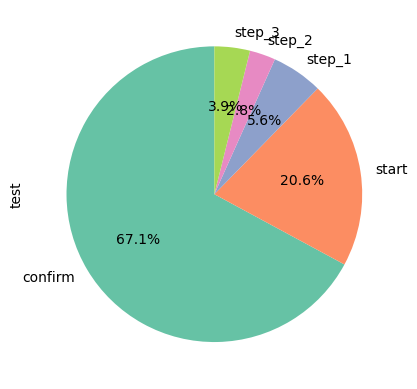

In [8]:
# pie chart of which step test group ended on, all steps except for 'confirm' decreased
latest_step_merged['test'].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"));

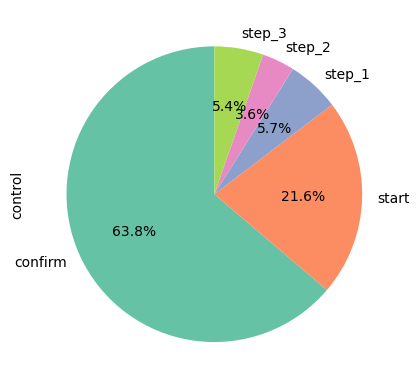

In [9]:
#pie chart of which step control group ended on
latest_step_merged['control'].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"));

HYPOTHESIS TESTING, COMPLETION RATE

H0 = Average number of clients reaching the confirm stage in the test group was equal to or less than the control group

H1 = Average number of clients reaching the confirm stage in the test group was less than the control group

In [13]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Data from the table
test_confirm = 17907
control_confirm = 14921
test_total = 17907 + 5486 + 1496 + 755 + 1036
control_total = 14921 + 5047 + 1342 + 835 + 1252

# Calculate proportions
p_test = test_confirm / test_total
p_control = control_confirm / control_total

# Pooled proportion
p_pooled = (test_confirm + control_confirm) / (test_total + control_total)

# Perform z-test for proportions
count = np.array([test_confirm, control_confirm])
nobs = np.array([test_total, control_total])

stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Output
print(f"Test statistic: {stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Test group is more likely to end on 'confirm'.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the test group is more likely to end on 'confirm'.")

Test statistic: 7.858, p-value: 0.000
Reject the null hypothesis: Test group is more likely to end on 'confirm'.


KeyError: False